In [22]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify

In [23]:
data = pd.read_csv("cleaned_diabetes_data.csv")

In [3]:
#Visualize the Dataframe
data

Unnamed: 0  _STATE  SEXVAR  _INCOMG1  HEIGHT3  HTIN4   HTM4    WTKG3  \
0                1     1.0     2.0       3.0    503.0   63.0  160.0   6804.0   
1                2     1.0     2.0       6.0    502.0   62.0  157.0   6350.0   
2                4     1.0     2.0       3.0    502.0   62.0  157.0   5398.0   
3                6     1.0     2.0       5.0    505.0   65.0  165.0   6260.0   
4                7     1.0     2.0       5.0    504.0   64.0  163.0   7348.0   
...            ...     ...     ...       ...      ...    ...    ...      ...   
234129      445126    78.0     1.0       5.0    600.0   72.0  183.0  10433.0   
234130      445127    78.0     2.0       1.0    505.0   65.0  165.0   6985.0   
234131      445128    78.0     2.0       5.0    507.0   67.0  170.0   8301.0   
234132      445130    78.0     1.0       5.0    600.0   72.0  183.0  10886.0   
234133      445131    78.0     1.0       2.0    506.0   66.0  168.0   6350.0   

        _BMI5CAT  _RACE1  ...  EXERANY2  SLEPTIM1  DISPCODE  PRIMINSR  \
0            3.0     1.0  ...       2.0       6.0    1100.0       3.0   
1            3.0     1.0  ...       1.0       5.0    1100.0       1.0   
2            2.0     1.0  ...       1.0       9.0    1100.0       7.0   
3            2.0     2.0  ...       1.0       7.0    1100.0       2.0   
4            3.0     1.0  ...       2.0       8.0    1100.0       3.0   
...          ...     ...  ...       ...       ...       ...       ...   
234129       4.0     1.0  ...       1.0       8.0    1100.0       1.0   
234130       3.0     2.0  ...       1.0       6.0    1100.0       3.0   
234131       3.0     2.0  ...       1.0       7.0    1100.0       1.0   
234132       4.0     2.0  ...       2.0       5.0    1100.0       3.0   
234133       2.0     2.0  ...       1.0       5.0    1100.0      88.0   

        PERSDOC3  CHECKUP1  CVDINFR4  CVDCRHD4  CVDSTRK3  HAVARTH4  
0            2.0       8.0       2.0       2.0       2.0       2.0  
1            1.0       1.0       2.0       2.0       2.0       2.0  
2            2.0       1.0       2.0       2.0       2.0       2.0  
3            1.0       1.0       2.0       2.0       2.0       2.0  
4            1.0       1.0       2.0       2.0       2.0       1.0  
...          ...       ...       ...       ...       ...       ...  
234129       3.0       2.0       2.0       2.0       2.0       2.0  
234130       3.0       2.0       2.0       2.0       2.0       2.0  
234131       2.0       1.0       2.0       2.0       2.0       2.0  
234132       2.0       1.0       1.0       2.0       2.0       2.0  
234133       3.0       8.0       2.0       2.0       2.0       2.0  

[234134 rows x 25 columns]

In [4]:
#Check the dimension of the data
data.shape

(234134, 25)

In [5]:
#Finding the null values for each column
data.isnull().sum()

Unnamed: 0    0
_STATE        0
SEXVAR        0
_INCOMG1      0
HEIGHT3       0
HTIN4         0
HTM4          0
WTKG3         0
_BMI5CAT      0
_RACE1        0
_AGEG5YR      0
DIABETE4      0
PHYSHLTH      0
MENTHLTH      0
_TOTINDA      0
EXERANY2      0
SLEPTIM1      0
DISPCODE      0
PRIMINSR      0
PERSDOC3      0
CHECKUP1      0
CVDINFR4      0
CVDCRHD4      0
CVDSTRK3      0
HAVARTH4      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234134 entries, 0 to 234133
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  234134 non-null  int64  
 1   _STATE      234134 non-null  float64
 2   SEXVAR      234134 non-null  float64
 3   _INCOMG1    234134 non-null  float64
 4   HEIGHT3     234134 non-null  float64
 5   HTIN4       234134 non-null  float64
 6   HTM4        234134 non-null  float64
 7   WTKG3       234134 non-null  float64
 8   _BMI5CAT    234134 non-null  float64
 9   _RACE1      234134 non-null  float64
 10  _AGEG5YR    234134 non-null  float64
 11  DIABETE4    234134 non-null  float64
 12  PHYSHLTH    234134 non-null  float64
 13  MENTHLTH    234134 non-null  float64
 14  _TOTINDA    234134 non-null  float64
 15  EXERANY2    234134 non-null  float64
 16  SLEPTIM1    234134 non-null  float64
 17  DISPCODE    234134 non-null  float64
 18  PRIMINSR    234134 non-null  float64
 19  PE

In [7]:
#How many Diabetes?
selected_column = 'DIABETE4'

# Plot the distribution using matplotlib
value_counts = data[selected_column].value_counts()
value_counts

3.0    192597
1.0     33875
4.0      5656
2.0      2006
Name: DIABETE4, dtype: int64

In [8]:
data.DIABETE4[data.DIABETE4 < 3] = 1
data.DIABETE4[data.DIABETE4 > 2] = 0

In [9]:
data.DIABETE4.unique()

array([0., 1.])

In [10]:
D = data[(data['DIABETE4'] == 1)]
H = data[(data['DIABETE4'] == 0)]

#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = data['DIABETE4'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=data['DIABETE4'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = data['DIABETE4'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [11]:
target_count()
target_percent()

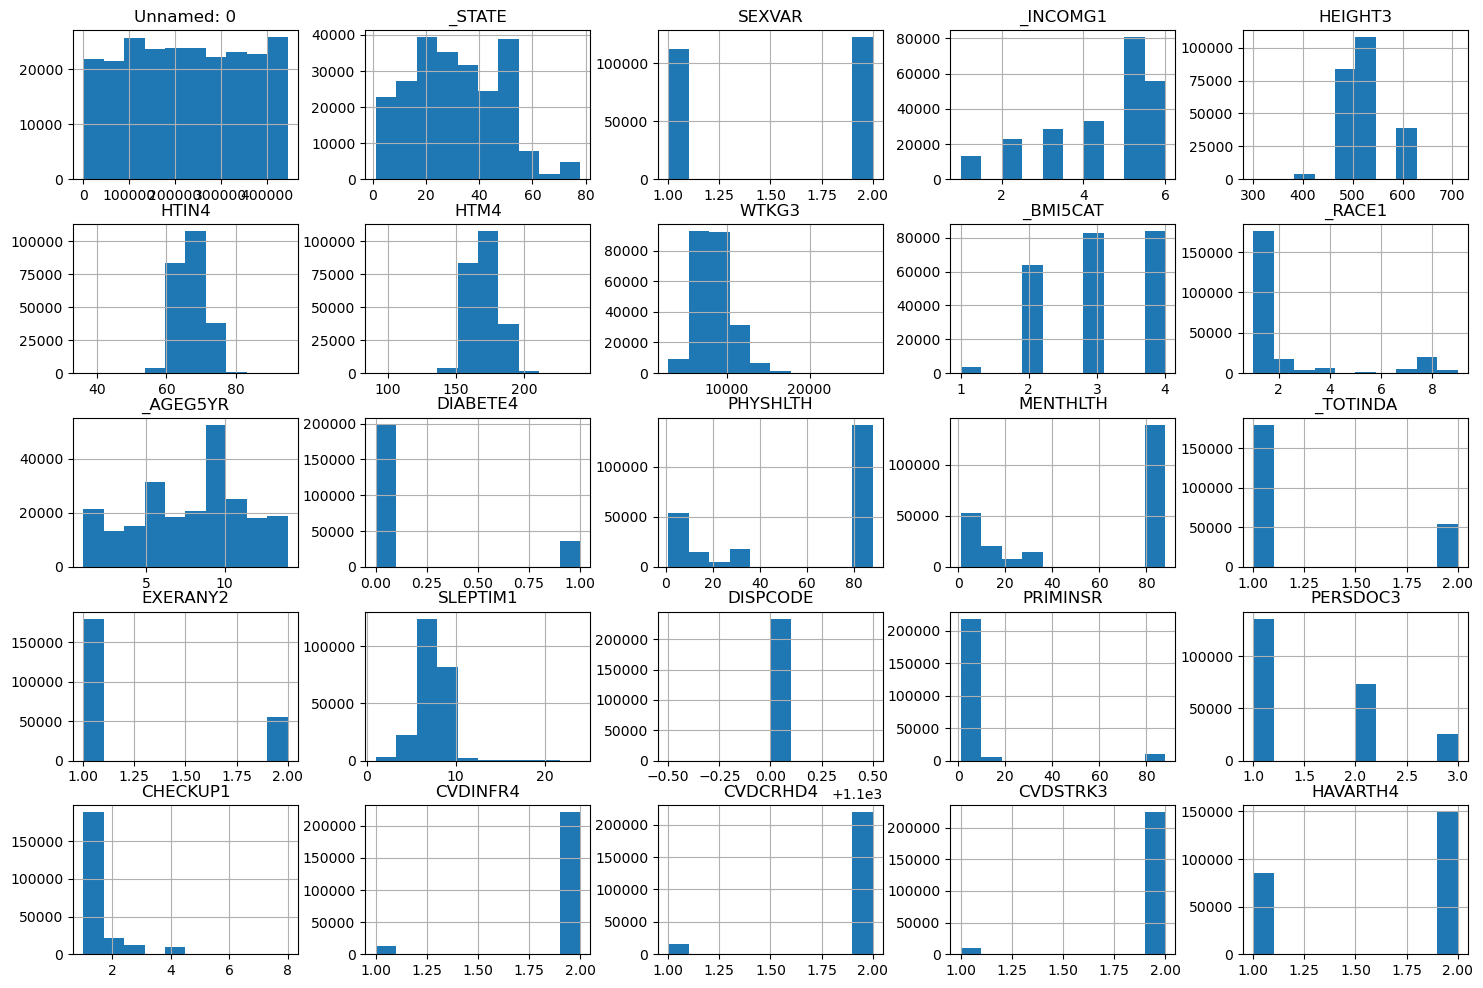

In [12]:
data.hist(figsize=(18,12))
plt.show()

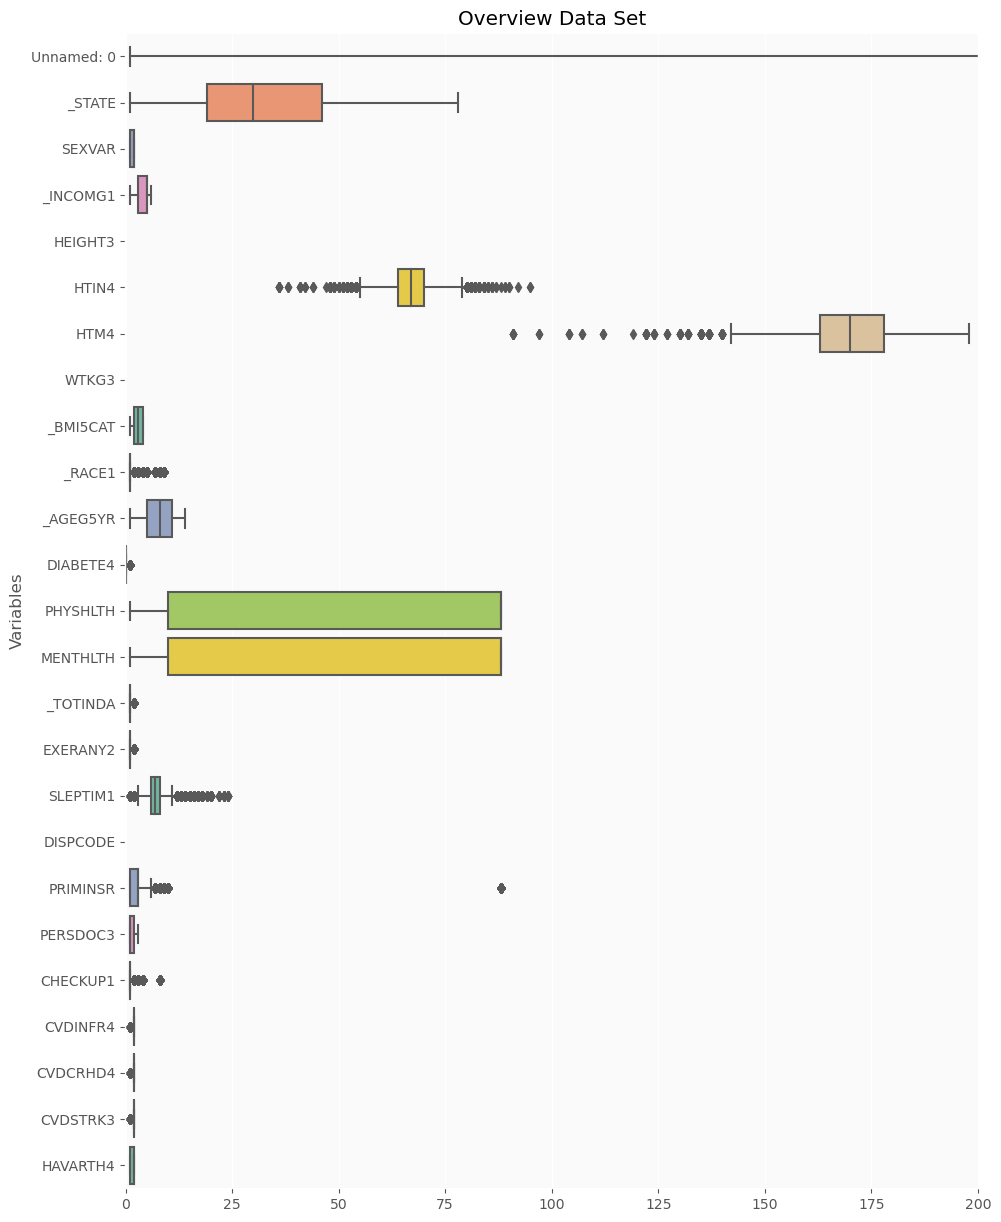

In [13]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data, 
  orient = 'h', 
  palette = 'Set2')

In [14]:
data.corr()

Unnamed: 0    _STATE    SEXVAR  _INCOMG1   HEIGHT3     HTIN4  \
Unnamed: 0    1.000000  0.989832  0.001670 -0.020792 -0.003764 -0.003488   
_STATE        0.989832  1.000000  0.005713 -0.040630 -0.012020 -0.014489   
SEXVAR        0.001670  0.005713  1.000000 -0.100934 -0.486348 -0.698801   
_INCOMG1     -0.020792 -0.040630 -0.100934  1.000000  0.118809  0.162486   
HEIGHT3      -0.003764 -0.012020 -0.486348  0.118809  1.000000  0.769487   
HTIN4        -0.003488 -0.014489 -0.698801  0.162486  0.769487  1.000000   
HTM4         -0.003473 -0.014497 -0.696726  0.162765  0.768457  0.999621   
WTKG3         0.010074  0.003544 -0.336922  0.037555  0.378296  0.467634   
_BMI5CAT      0.012614  0.011568 -0.042237 -0.016052  0.020669  0.015433   
_RACE1        0.042383  0.081087 -0.008981 -0.149984 -0.076040 -0.100854   
_AGEG5YR     -0.012062 -0.007976  0.039691 -0.095469 -0.089860 -0.106151   
DIABETE4      0.000896  0.005272 -0.006190 -0.124274 -0.019087 -0.024367   
PHYSHLTH     -0.000639  0.001775 -0.065070  0.105090  0.031158  0.042487   
MENTHLTH      0.003097  0.010700 -0.126372  0.046330  0.041332  0.062178   
_TOTINDA      0.001666  0.009854  0.055167 -0.213254 -0.058245 -0.082173   
EXERANY2      0.001666  0.009854  0.055167 -0.213254 -0.058245 -0.082173   
SLEPTIM1      0.003747  0.001889  0.012909  0.005653 -0.011240 -0.008994   
DISPCODE           NaN       NaN       NaN       NaN       NaN       NaN   
PRIMINSR     -0.003849 -0.002233 -0.047086 -0.149704  0.010199  0.012308   
PERSDOC3     -0.013321 -0.016784 -0.051957 -0.035577  0.033646  0.042293   
CHECKUP1      0.003242 -0.000884 -0.100983 -0.013582  0.068754  0.087447   
CVDINFR4      0.004029  0.003994  0.080420  0.103329 -0.011531 -0.028420   
CVDCRHD4      0.004455  0.004493  0.067967  0.079846 -0.004272 -0.020127   
CVDSTRK3      0.009467  0.009641  0.004741  0.112913  0.018676  0.020822   
HAVARTH4     -0.000511  0.000596 -0.092864  0.142891  0.069078  0.094302   

                HTM4     WTKG3  _BMI5CAT    _RACE1  ...  EXERANY2  SLEPTIM1  \
Unnamed: 0 -0.003473  0.010074  0.012614  0.042383  ...  0.001666  0.003747   
_STATE     -0.014497  0.003544  0.011568  0.081087  ...  0.009854  0.001889   
SEXVAR     -0.696726 -0.336922 -0.042237 -0.008981  ...  0.055167  0.012909   
_INCOMG1    0.162765  0.037555 -0.016052 -0.149984  ... -0.213254  0.005653   
HEIGHT3     0.768457  0.378296  0.020669 -0.076040  ... -0.058245 -0.011240   
HTIN4       0.999621  0.467634  0.015433 -0.100854  ... -0.082173 -0.008994   
HTM4        1.000000  0.467377  0.015425 -0.101166  ... -0.082297 -0.008970   
WTKG3       0.467377  1.000000  0.740486 -0.035729  ...  0.096127 -0.053530   
_BMI5CAT    0.015425  0.740486  1.000000  0.015316  ...  0.122006 -0.047529   
_RACE1     -0.101166 -0.035729  0.015316  1.000000  ...  0.040050 -0.060134   
_AGEG5YR   -0.106245 -0.082530 -0.006991 -0.175715  ...  0.111547  0.132172   
DIABETE4   -0.024473  0.158563  0.179325  0.018777  ...  0.136358  0.005978   
PHYSHLTH    0.042346 -0.061330 -0.065855  0.003017  ... -0.101077  0.052781   
MENTHLTH    0.061824 -0.008130 -0.013012 -0.010242  ... -0.010252  0.093630   
_TOTINDA   -0.082297  0.096127  0.122006  0.040050  ...  1.000000 -0.007286   
EXERANY2   -0.082297  0.096127  0.122006  0.040050  ...  1.000000 -0.007286   
SLEPTIM1   -0.008970 -0.053530 -0.047529 -0.060134  ... -0.007286  1.000000   
DISPCODE         NaN       NaN       NaN       NaN  ...       NaN       NaN   
PRIMINSR    0.012103 -0.002611 -0.012191  0.114575  ...  0.031536 -0.029437   
PERSDOC3    0.042141 -0.007158 -0.033649  0.056043  ...  0.006941 -0.036259   
CHECKUP1    0.087278 -0.011562 -0.058783  0.043755  ... -0.022287 -0.052870   
CVDINFR4   -0.028239 -0.036843 -0.030240  0.020738  ... -0.082414 -0.004391   
CVDCRHD4   -0.019932 -0.044891 -0.042922  0.033244  ... -0.082426 -0.012841   
CVDSTRK3    0.020873 -0.003212 -0.014746  0.011707  ... -0.078394 -0.012651   
HAVARTH4    0.094262 -0.063421 -0.111938  0.084990  ... -0.1

In [15]:
def correlation_plot():
    #correlation
    correlation = data.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                      )
    layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)

In [16]:
correlation_plot()

In [24]:
correlation_matrix = data.corr()['DIABETE4'].sort_values(ascending=False)

# Print or visualize the correlation values
print(correlation_matrix)

DIABETE4      1.000000
CVDCRHD4      0.144997
HAVARTH4      0.137470
CVDINFR4      0.134132
CHECKUP1      0.116262
_INCOMG1      0.112733
CVDSTRK3      0.100125
PHYSHLTH      0.076626
PERSDOC3      0.036273
PRIMINSR      0.032659
SEXVAR        0.018285
HTM4          0.011957
HTIN4         0.011827
HEIGHT3       0.010531
Unnamed: 0    0.000564
_STATE       -0.002979
SLEPTIM1     -0.009711
_RACE1       -0.010523
MENTHLTH     -0.021836
_TOTINDA     -0.130737
EXERANY2     -0.130737
WTKG3        -0.149528
_BMI5CAT     -0.164117
_AGEG5YR     -0.179962
DISPCODE           NaN
Name: DIABETE4, dtype: float64


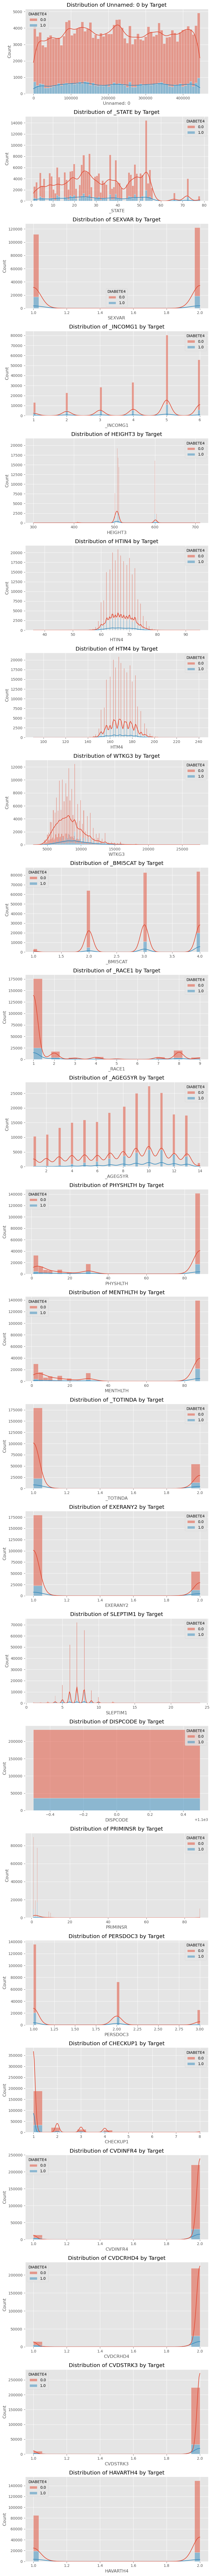

In [18]:
features = data.drop('DIABETE4', axis=1)

# Plot distribution of each feature according to the target variable
fig, axes = plt.subplots(nrows=len(features.columns), ncols=1, figsize=(8, 4 * len(features.columns)))

for i, feature in enumerate(features.columns):
    sns.histplot(data=data, x=feature, hue='DIABETE4', multiple='stack', ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature} by Target')

plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(data, hue='DIABETE4')
plt.show()

In [237]:
def plot_feat1_feat2(feat1, feat2) :  
    D = gen_info_df[(gen_info_df['DIABETE4'] == 1)]
    H = gen_info_df[(gen_info_df['DIABETE4'] == 0)]
    trace0 = go.Scatter(
        x = D[feat1],
        y = D[feat2],
        name = 'diabetic',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = 'healthy',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [238]:
plot_feat1_feat2('CVDCRHD4','_AGEG5YR')

In [239]:
def barplot(var_select, sub) :
    tmp1 = data[(gen_info_df['DIABETE4'] != 0)]
    tmp2 = data[(gen_info_df['DIABETE4'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],gen_info_df['DIABETE4']), )
    tmp3['% diabetic'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        text=tmp1[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='diabetic',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        text=tmp2[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='healthy', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['% diabetic'],
        yaxis = 'y2',
        name='% diabetic', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select)+' '+(sub),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% diabetic'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)